In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
## cv2 model for openCV prgramming functions
import cv2
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
## since there is  not direct labelEncoder to classify all 5 classes we need to se sklearn here
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
## total five classes are used here which are Neem,Mint,Curry,Arjun,March Pennywort
## all of them have different nubers of leaf in the drive for training and testing the image processing model
categories=['Neem Leaf','Mint Leaf','Curry Leaf','Arjun Leaf','Marsh Pennywort Leaf']
dir_path='/content/drive/My Drive/Augmented Images'
dataset=[]
SIZE=256
for i in categories:
  count=0
  path=dir_path+'/'+i
  for image in os.listdir(path):
    image_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(image_array,(SIZE,SIZE))
    dataset.append([new_array,i])
    count+=1
  print(f"number of {i} images : {count}")
print(f"total number of images : {len(dataset)}")

number of Neem Leaf images : 490
number of Mint Leaf images : 1541
number of Curry Leaf images : 1165
number of Arjun Leaf images : 1540
number of Marsh Pennywort Leaf images : 1470
total number of images : 6206


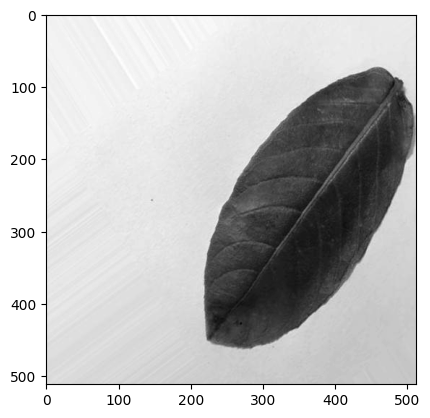

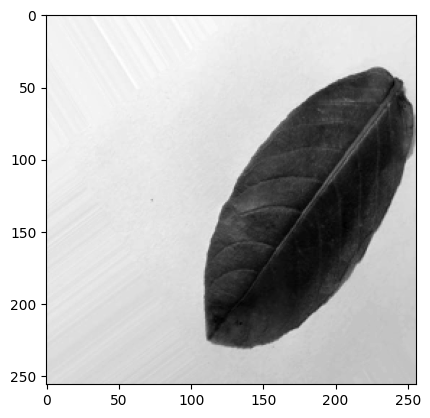

In [9]:
## viewing image after changing its size for the last image
plt.imshow(image_array,cmap="gray")
plt.figure()
plt.imshow(new_array,cmap="gray")
plt.show()

In [30]:
x=[]
y=[]
for feature, label in dataset:
  x.append(feature)
  y.append(label)
x=np.array(x).reshape(-1,SIZE,SIZE,1)
# x=np.array(x)/255
print(x.shape)
y=np.array(y)
# print(y.shape)
# print(x[0].shape)
# print(x.shape[0],"number of training samples")
# print(x[5000][255][25])

(6206, 256, 256, 1)
(6206,)


In [36]:
label_encoder=LabelEncoder()
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(x,y,test_size=0.2,random_state=42)
# print(X_train)